In [ ]:
cd ../

/home/vlaurent/Project/tools/ml-toolbox


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection, metrics
from sklearn.datasets import make_regression
from palma import Project, ModelEvaluation, ModelSelector
from palma.components import RegressionAnalysis, ShapAnalysis
from palma.utils import plotting
X, y = make_regression(n_informative=2, n_features=10)
X, y = pd.DataFrame(X), pd.Series(y)

**Create the project**
To create vanilla project (without components), only input data $X$, target data $y$ and validation method needs to be provided.



In [18]:
project = Project(problem="regression", project_name="test")
project.start(
    X, y,
    splitter=model_selection.ShuffleSplit(n_splits=5, random_state=42),
)

Here are representation of the validation strategy

- For validation steps
- For test steps

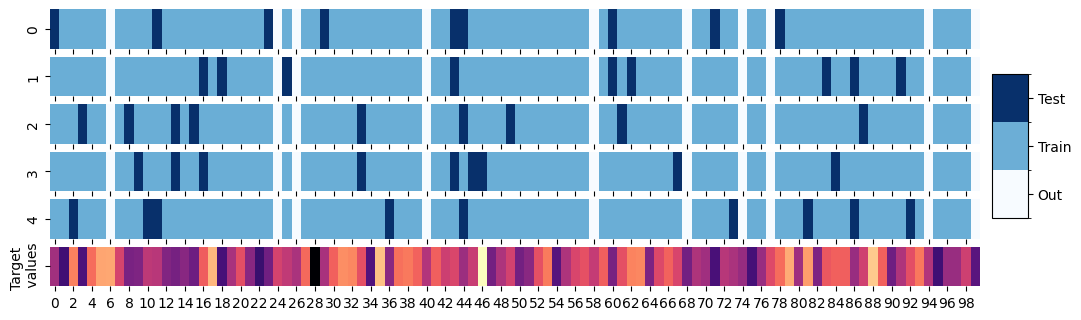

In [19]:
res = plotting.plot_splitting_strategy(
    project.X, project.y, 
    iter_cross_validation=project.validation_strategy.indexes_val, cmap="rainbow_r")

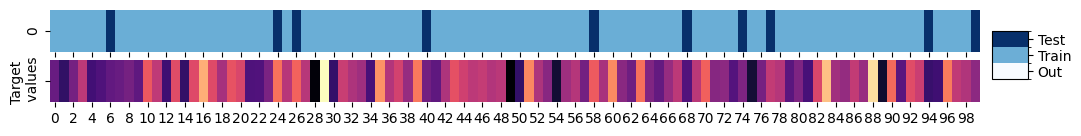

In [5]:
res = plotting.plot_splitting_strategy(
    project.X, project.y, 
    iter_cross_validation=project.validation_strategy.indexes_train_test, cmap="rainbow_r")

In [9]:
%%capture
ms = ModelSelector(engine="FlamlOptimizer",
                   engine_parameters=dict(time_budget=5))
ms.start(project)

In [10]:
model = ModelEvaluation(estimator=ms.best_model_)
model.add(RegressionAnalysis(on="indexes_val"))
model.add(ShapAnalysis(on="indexes_val", n_shap=100))
model.fit(project)

In [11]:
analyser = model.components["RegressionAnalysis"]
shap_analyser = model.components["ShapAnalysis"]

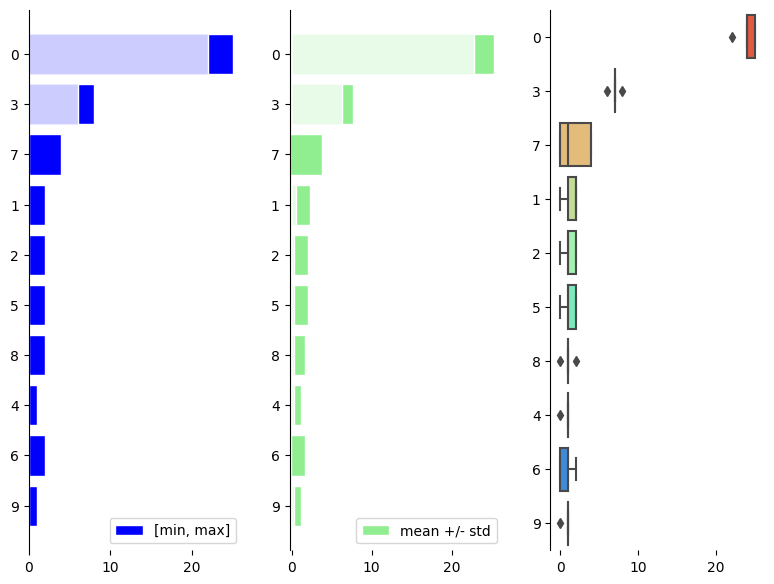

In [12]:
f, ax = plt.subplots(figsize=(8, 6), ncols=3)
plt.sca(ax[0])
analyser.plot_variable_importance(mode="minmax", color="blue")
plt.sca(ax[1])
analyser.plot_variable_importance(mode="std", color="lightgreen")
plt.sca(ax[2])
analyser.plot_variable_importance(mode="boxplot", cmap="rainbow_r")
print()

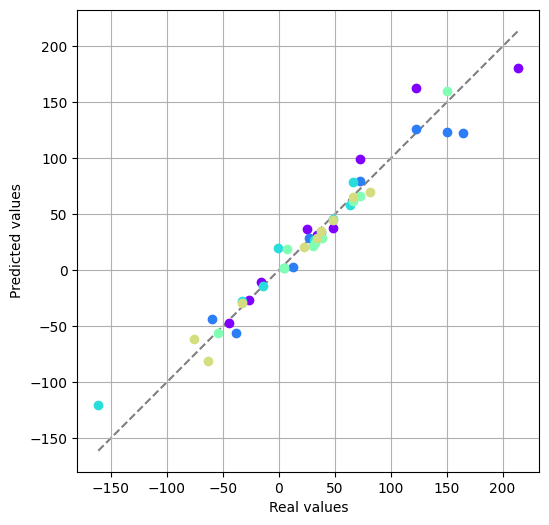

In [13]:
plt.figure(figsize=(6, 6))
analyser.plot_prediction_versus_real()

In [14]:
analyser.compute_metrics(
   { "r2": metrics.r2_score,
    "mae": metrics.mean_absolute_error,
    "mse": metrics.mean_squared_error}
)
analyser.get_test_metrics()

,r2,mae,mse
0,0.928315,14.908104,419.681691
1,0.936075,14.309546,357.968326
2,0.940685,10.564246,257.569923
3,0.978051,7.200896,61.087412
4,0.972026,6.788972,79.662487


In [27]:
most_important_var = analyser.variable_importance().T.mean().sort_values(ascending=False).index[0:3]

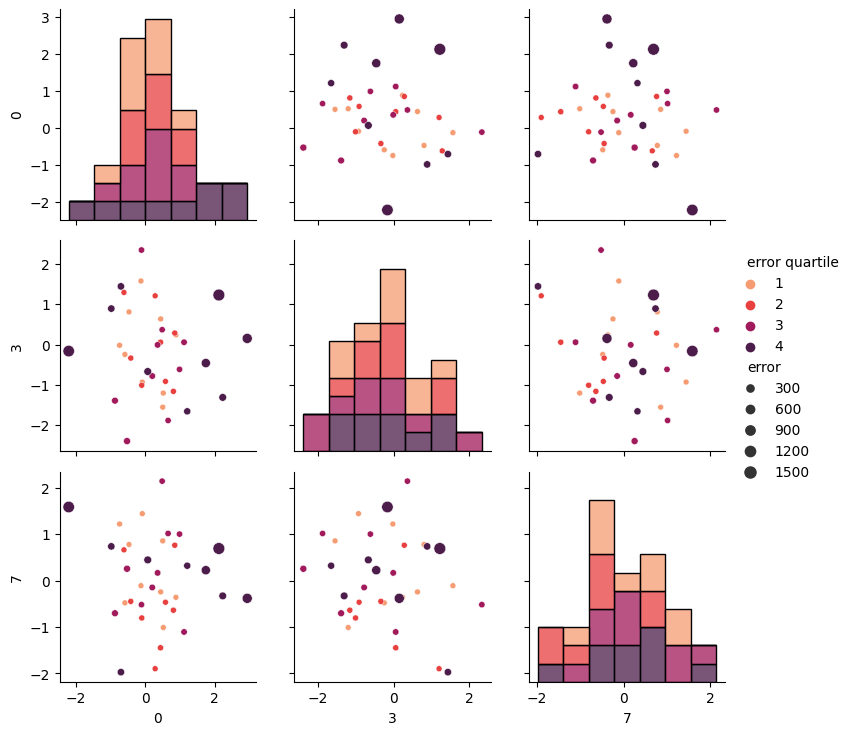

In [28]:
analyser.plot_errors_pairgrid(features=most_important_var)